In [1]:
%%capture
from xai import *

In [2]:
# 1. data
# load data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)
samples_test, sample_labels_test = sample_and_categorize(test_images, test_labels, number=len(test_labels))
print(samples.shape)
print(sample_labels.shape)

# reshape data
x_train = np.reshape(samples, (-1, 784))
# x_train = np.reshape(train_images, (-1, 784))
print(x_train.shape)

(3000, 28, 28, 1)
(3000,)
(3000, 784)


In [3]:
# 2. model: train a VAE
# model_pre = VAE(latent_dim=12)

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.

# dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))
# history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=50, batch_size=100)
# plot_learning_curve(history)
# model_pre.save()

In [4]:
vae = VAE.load("trained_models")
cnn = load_model("trained_models/classifier.h5")
xai = xai_model(vae.decoder, cnn, input_shape=(12,))
xai.summary()


2024-04-18 22:35:25.665293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-18 22:35:25.675644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-18 22:35:25.676231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-18 22:35:25.677057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               408848    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 10)                454922    
Total params: 863,770
Trainable params: 863,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
view_samples = samples_test
view_sample_labels = sample_labels_test
# view_samples = samples
# view_sample_labels = sample_labels

In [6]:

    x_view = np.reshape(view_samples, (-1, 784))
    y_view_onehot = tf.one_hot(tf.constant(view_sample_labels), depth=10).numpy()
    h_view = vae.encoder.predict(x_view)


2024-04-18 22:35:26.952309: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


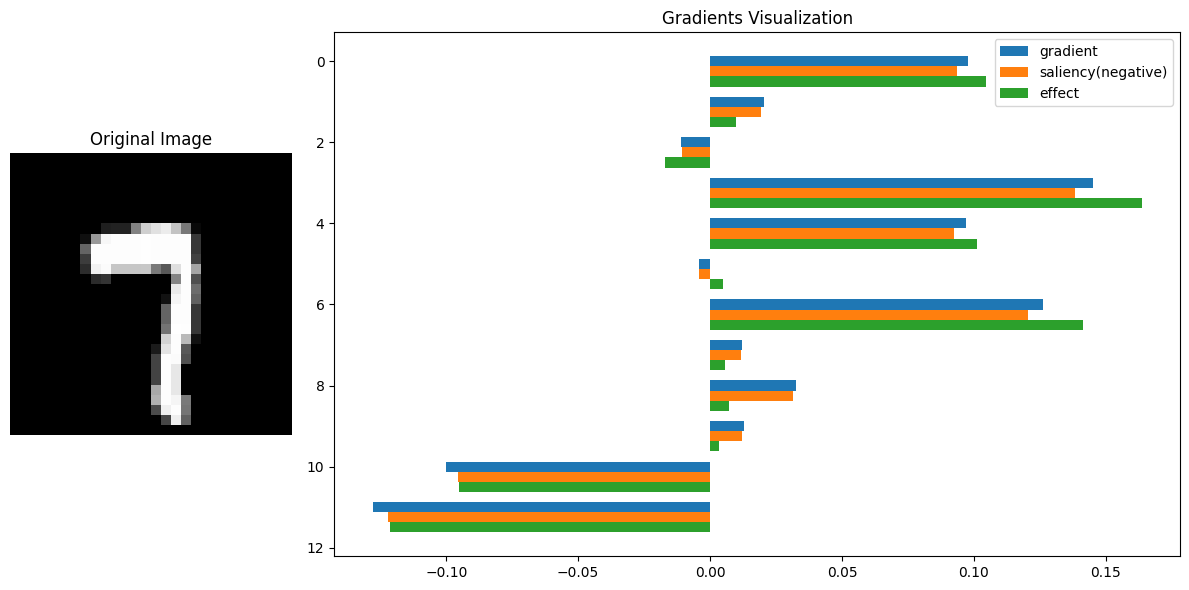

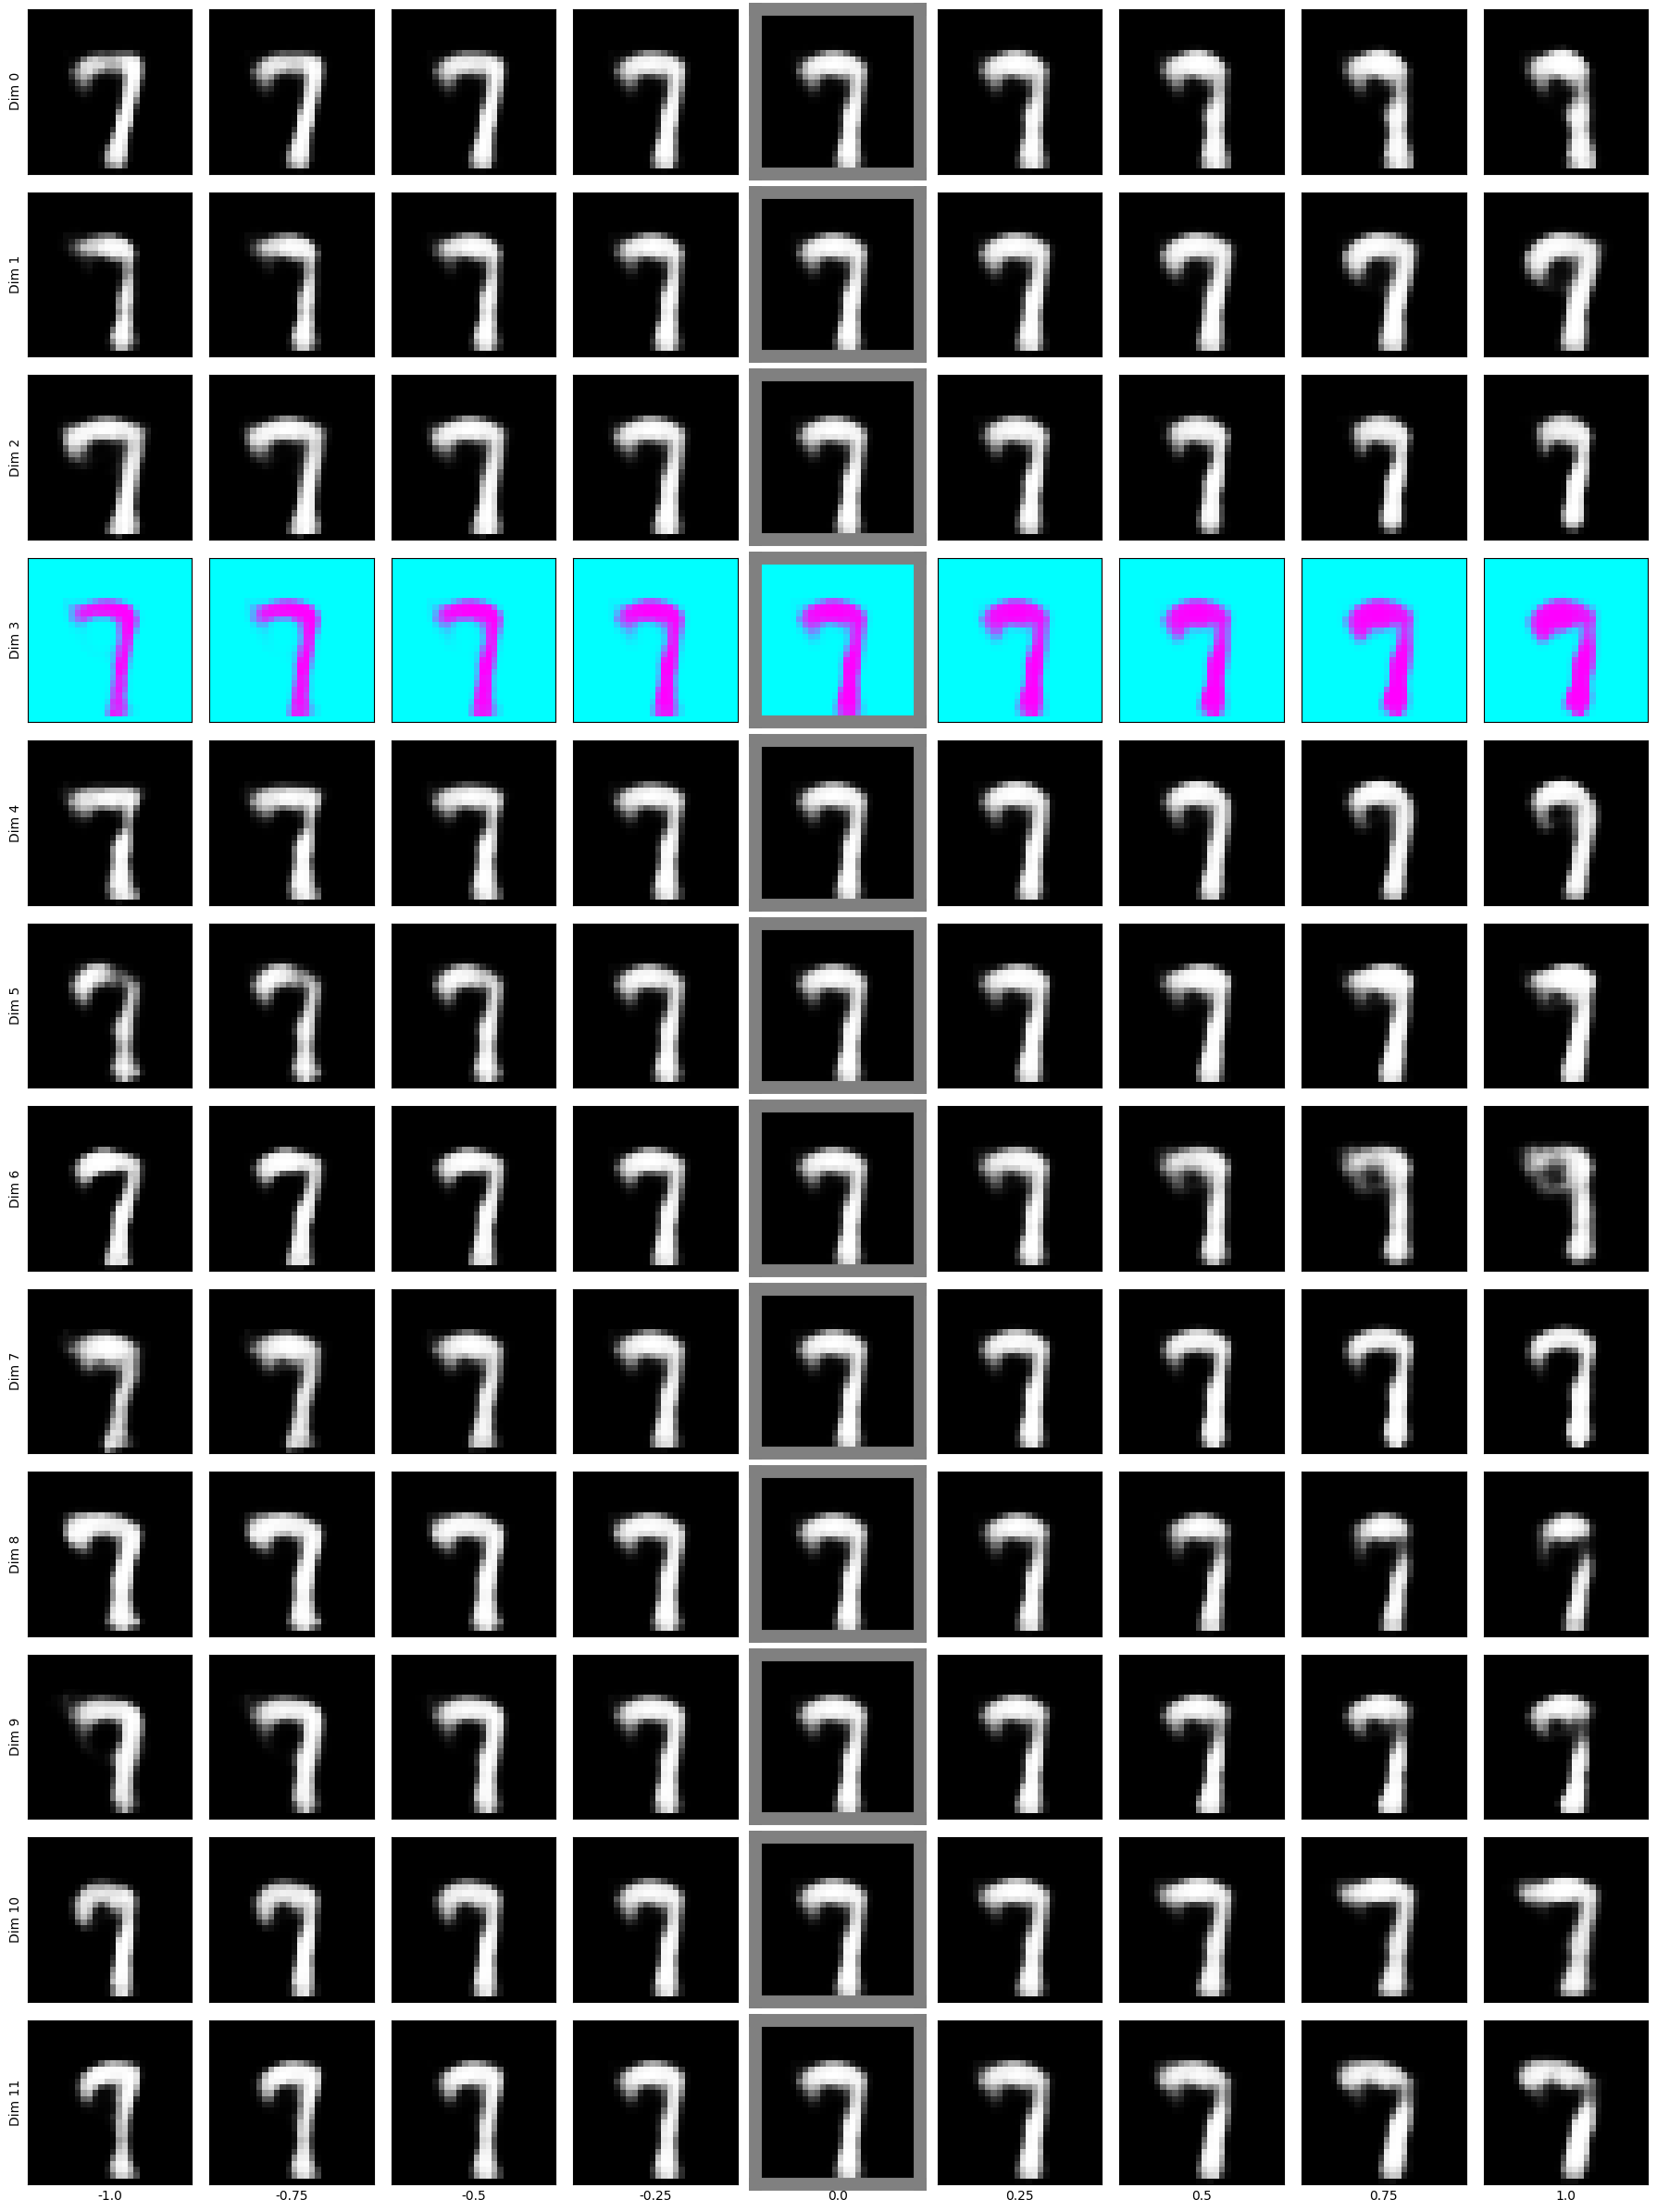

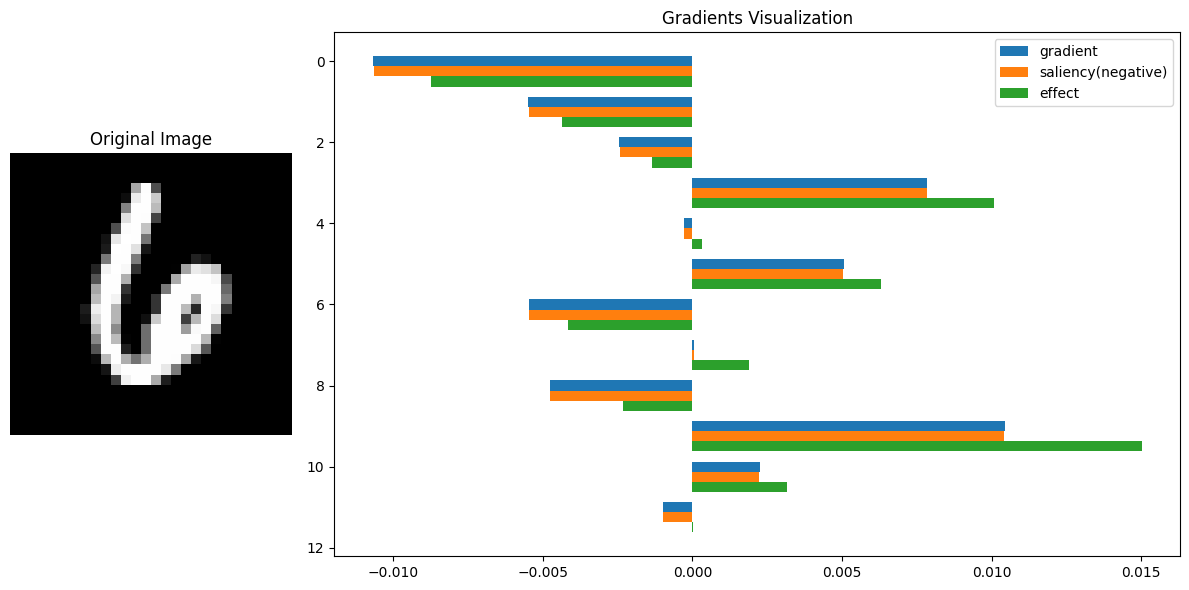

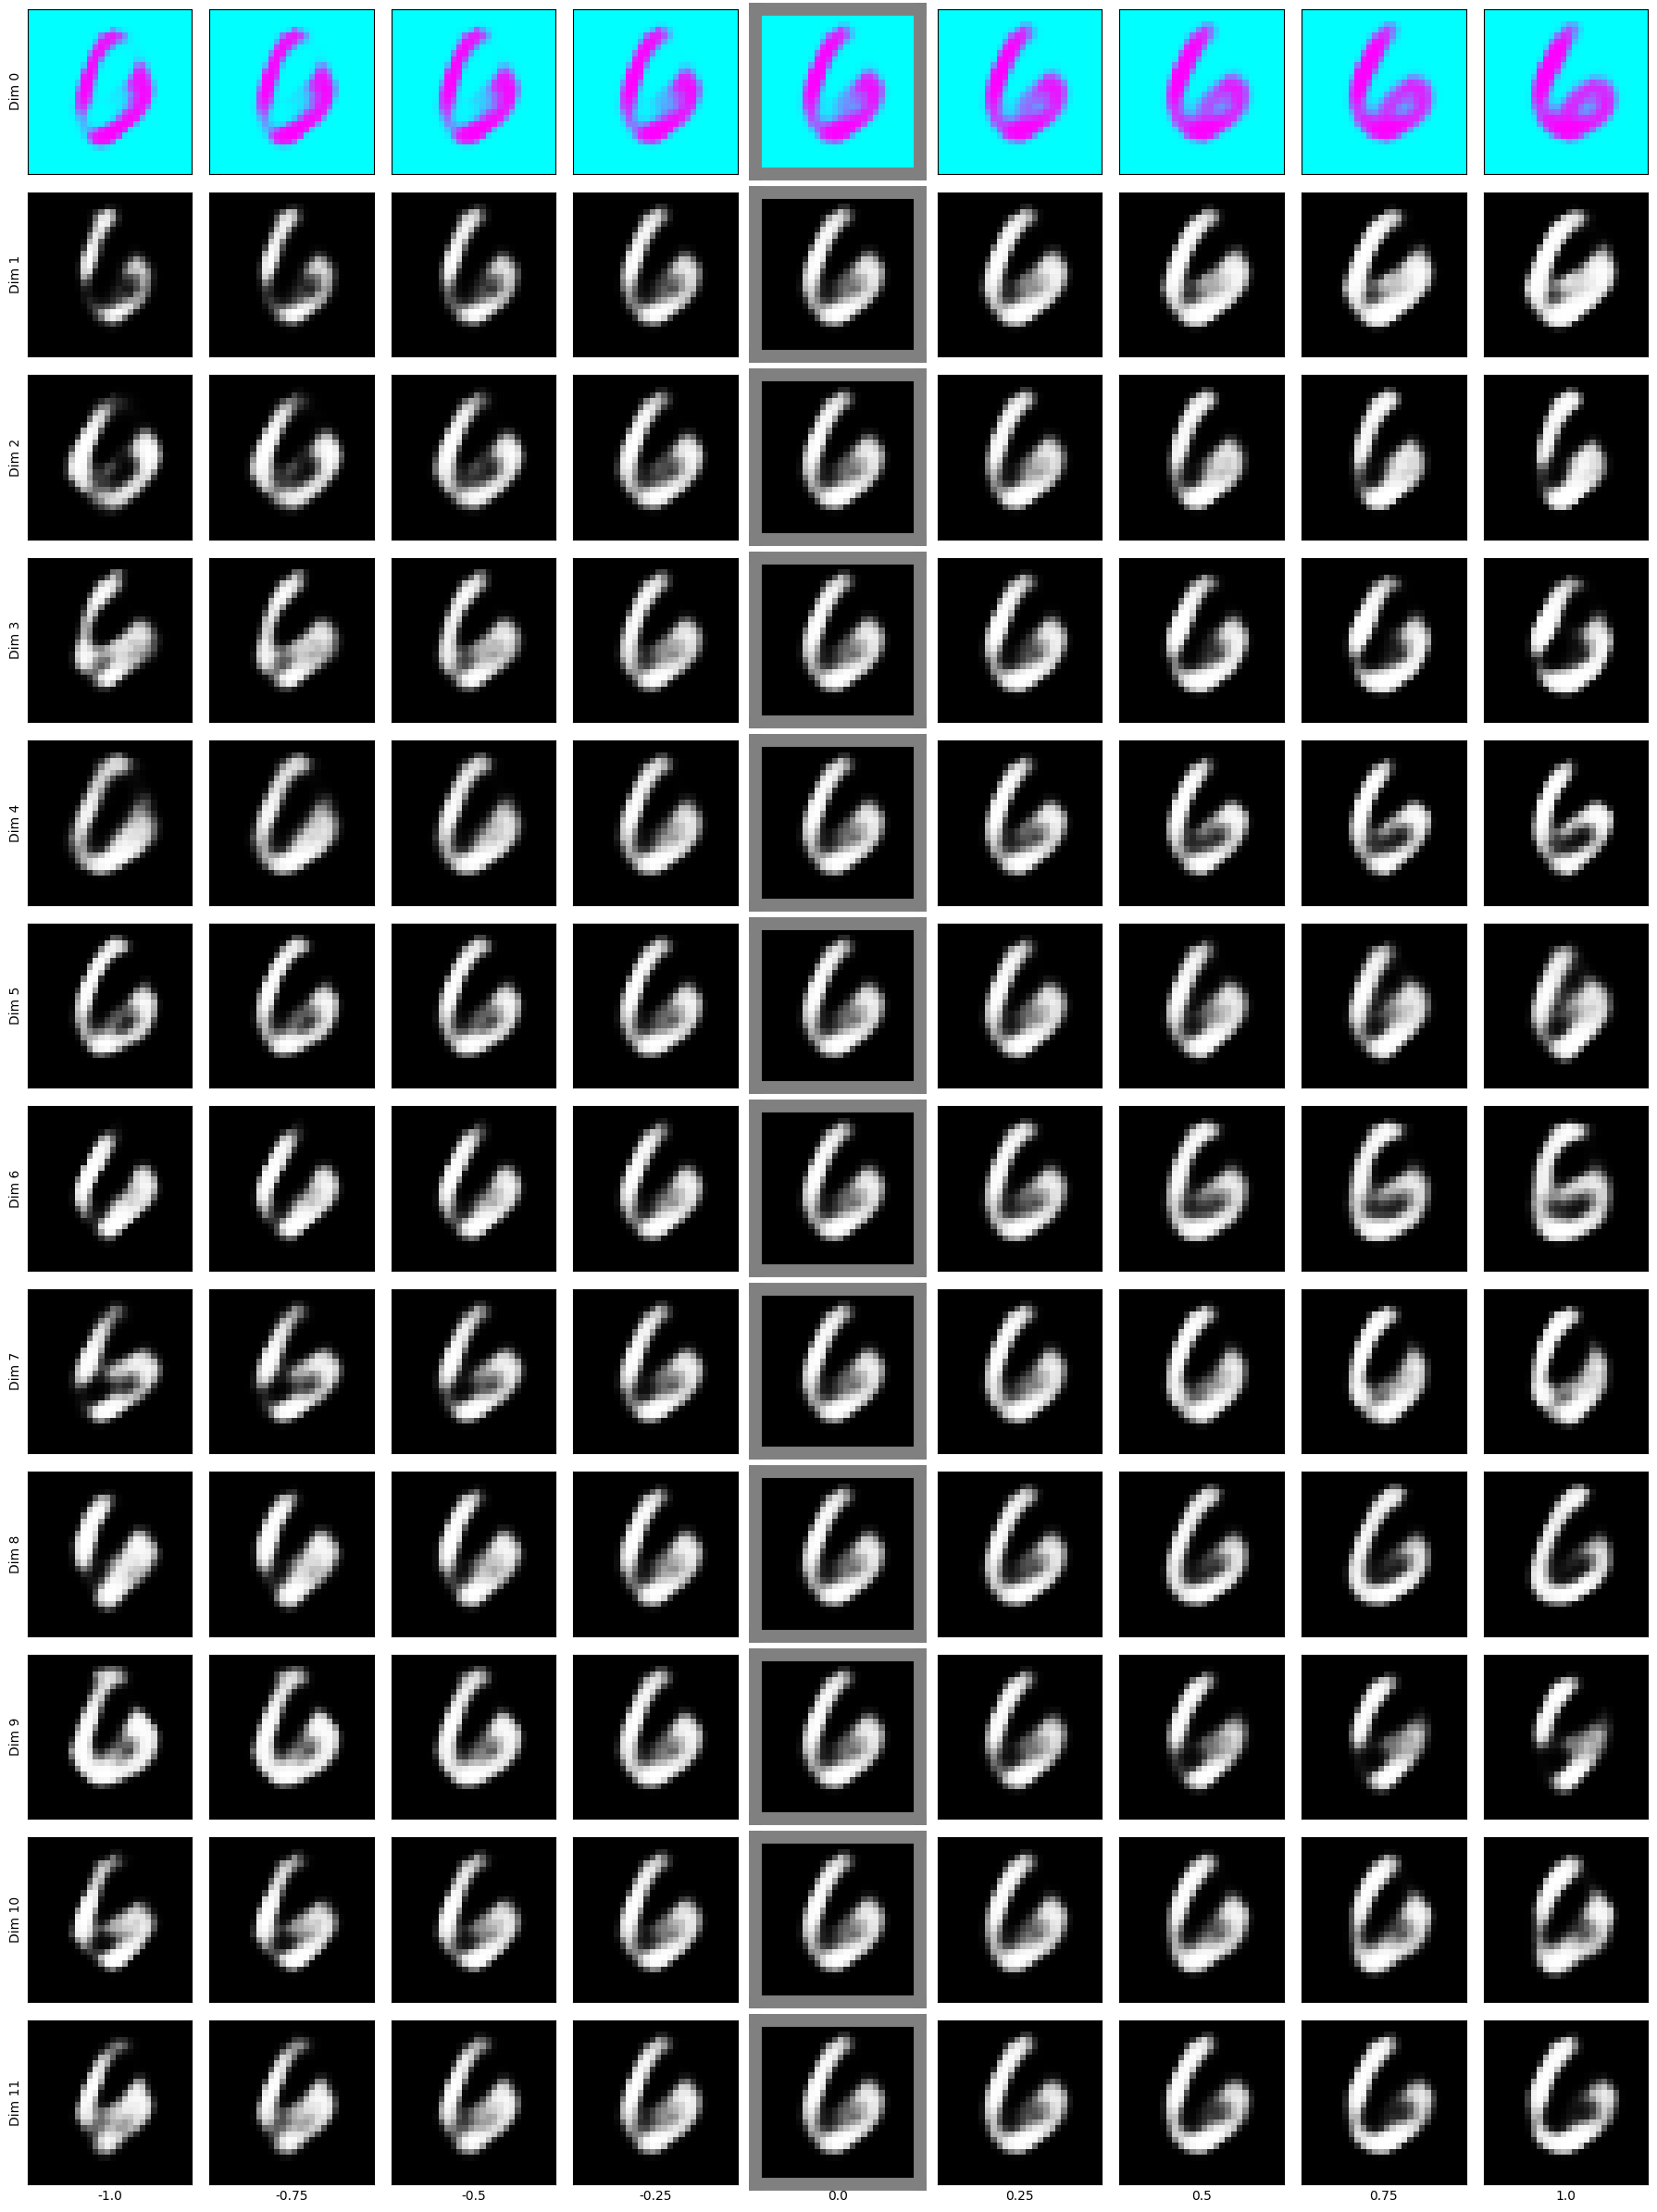

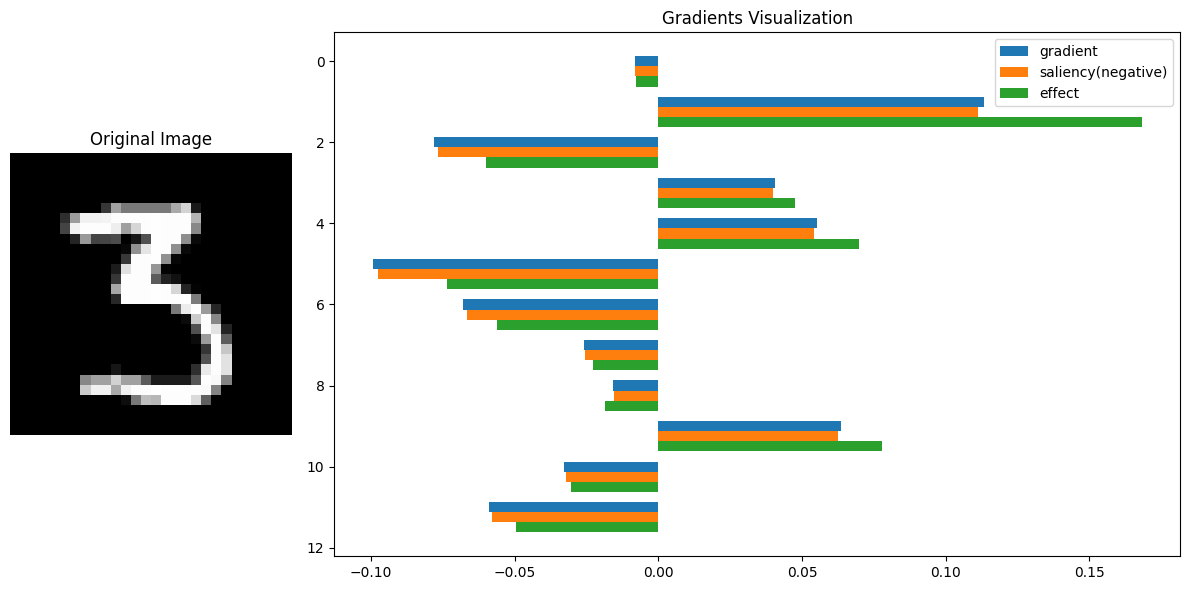

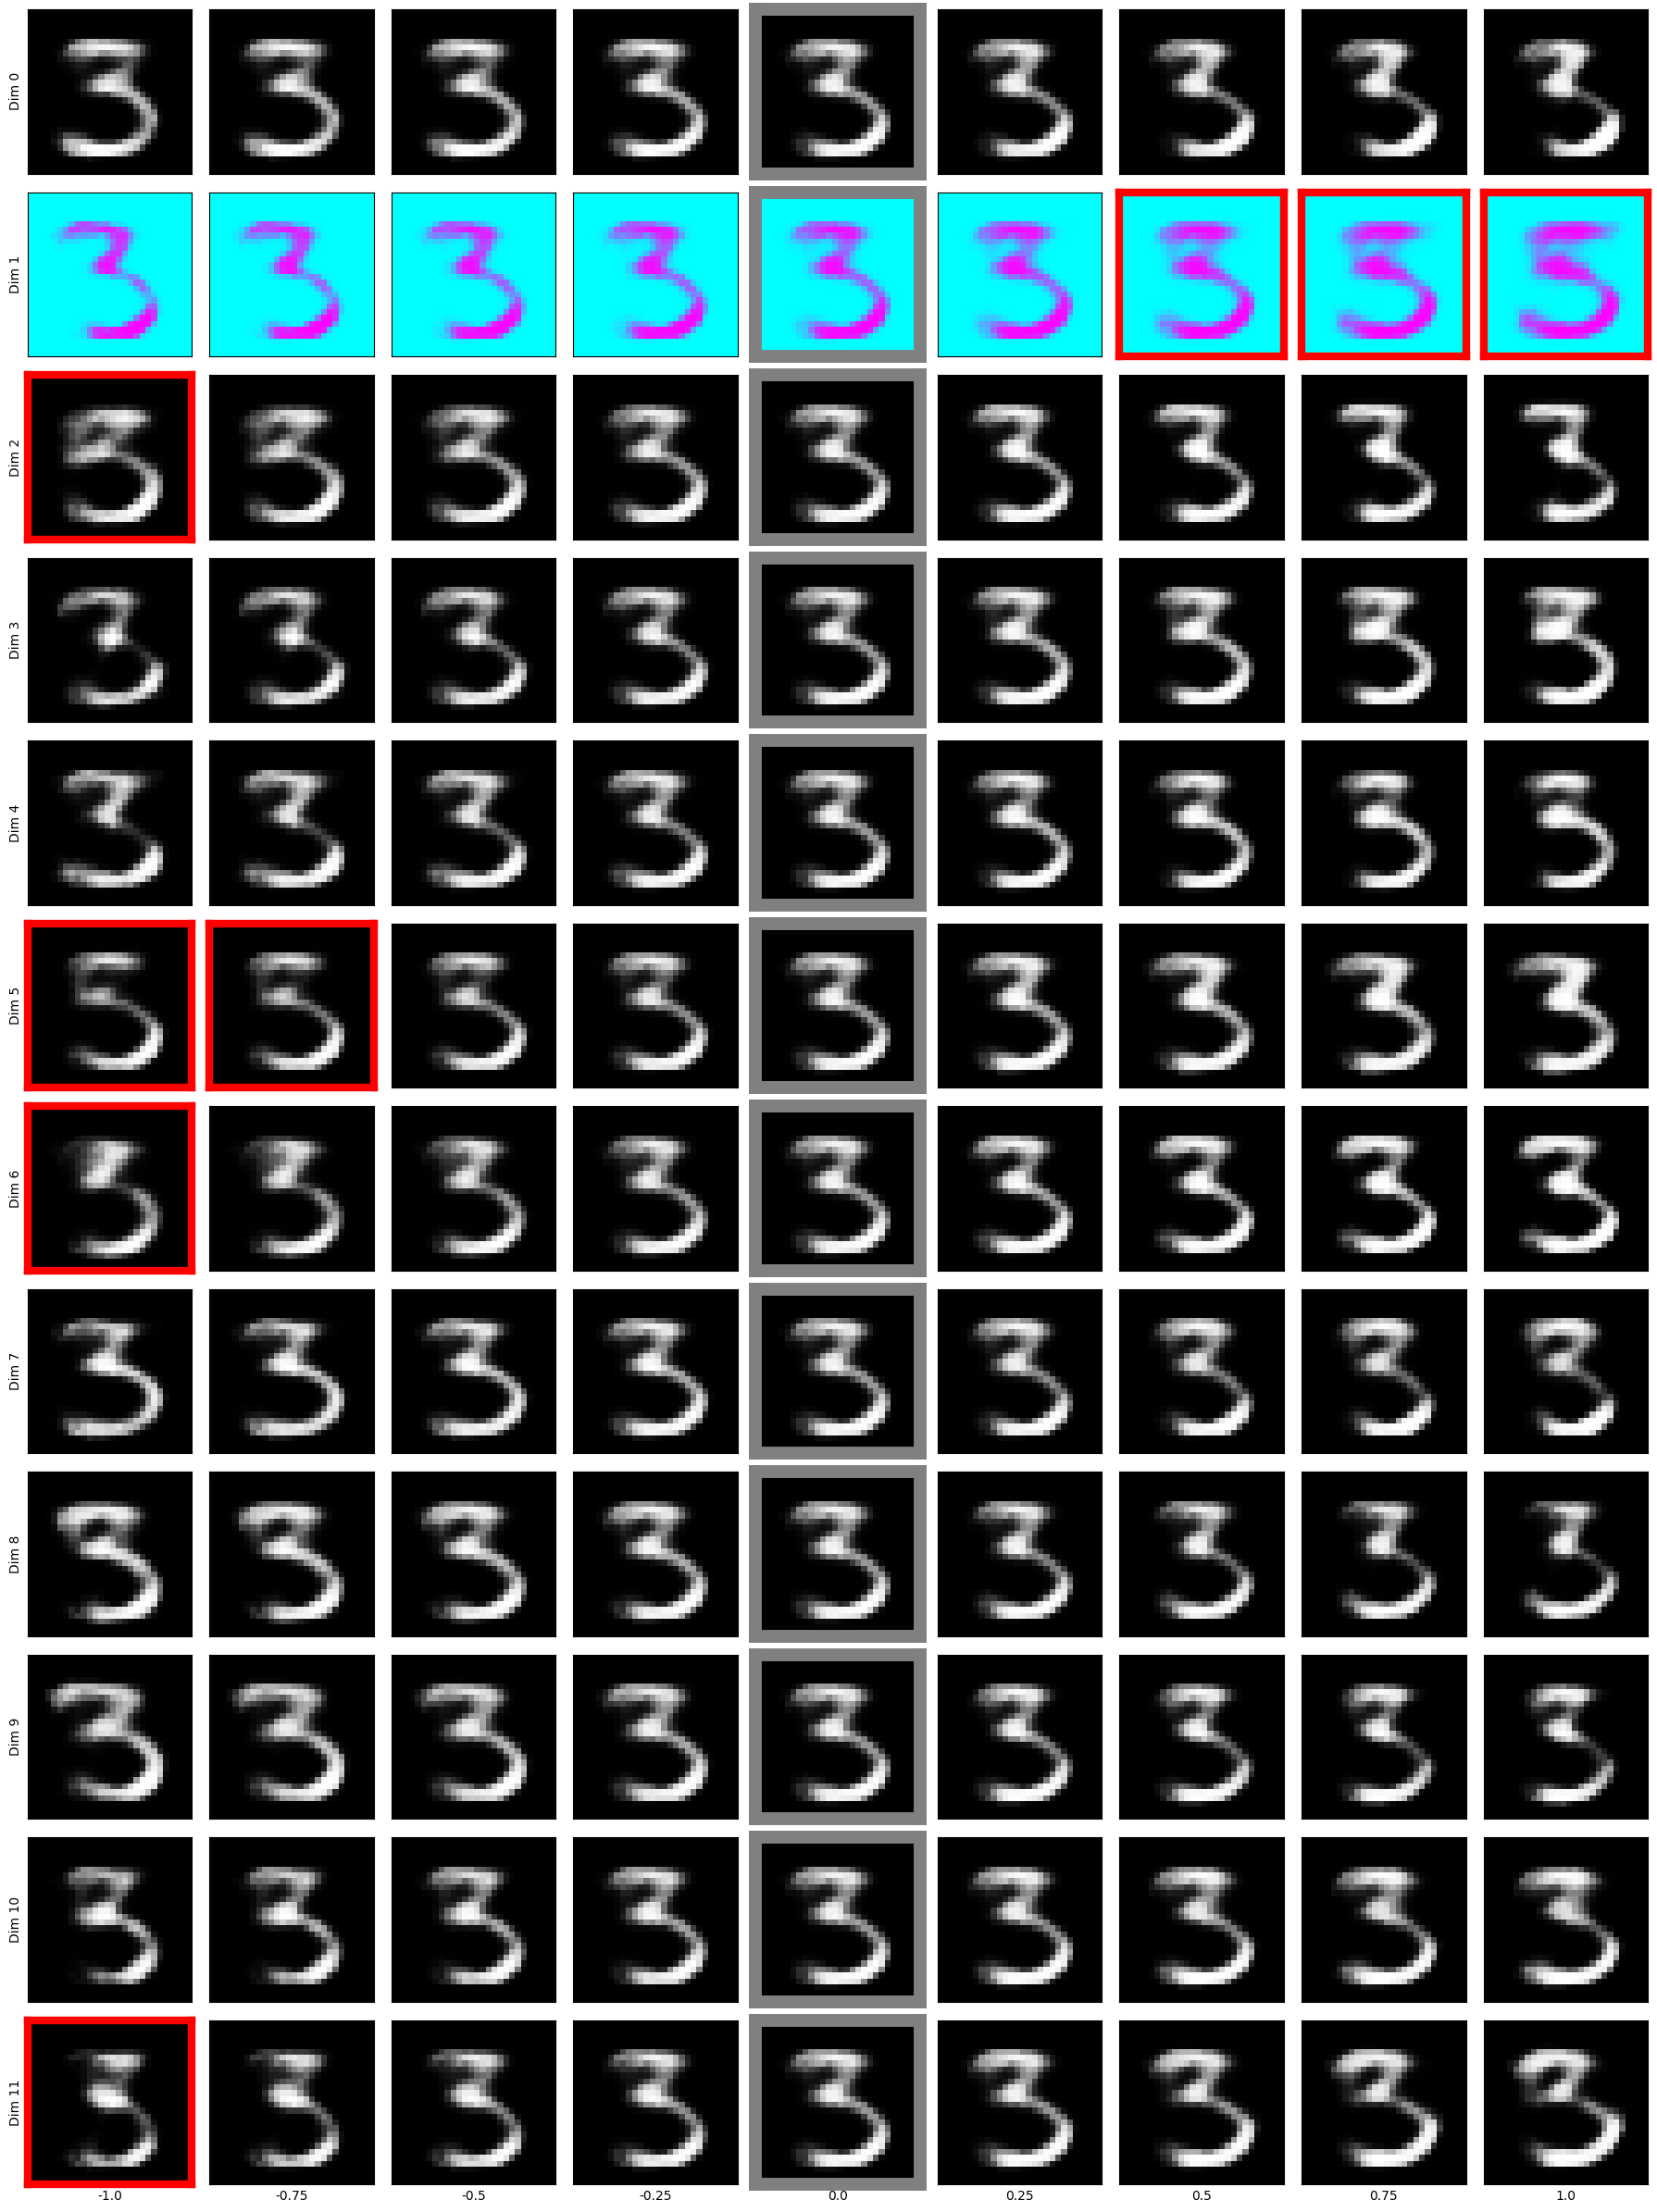

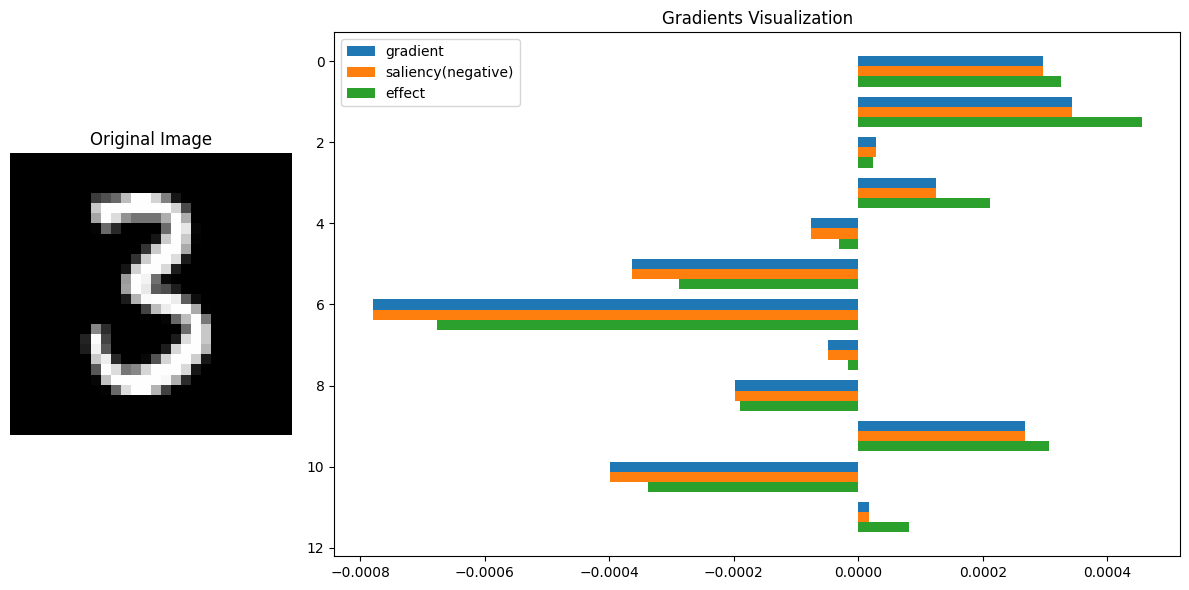

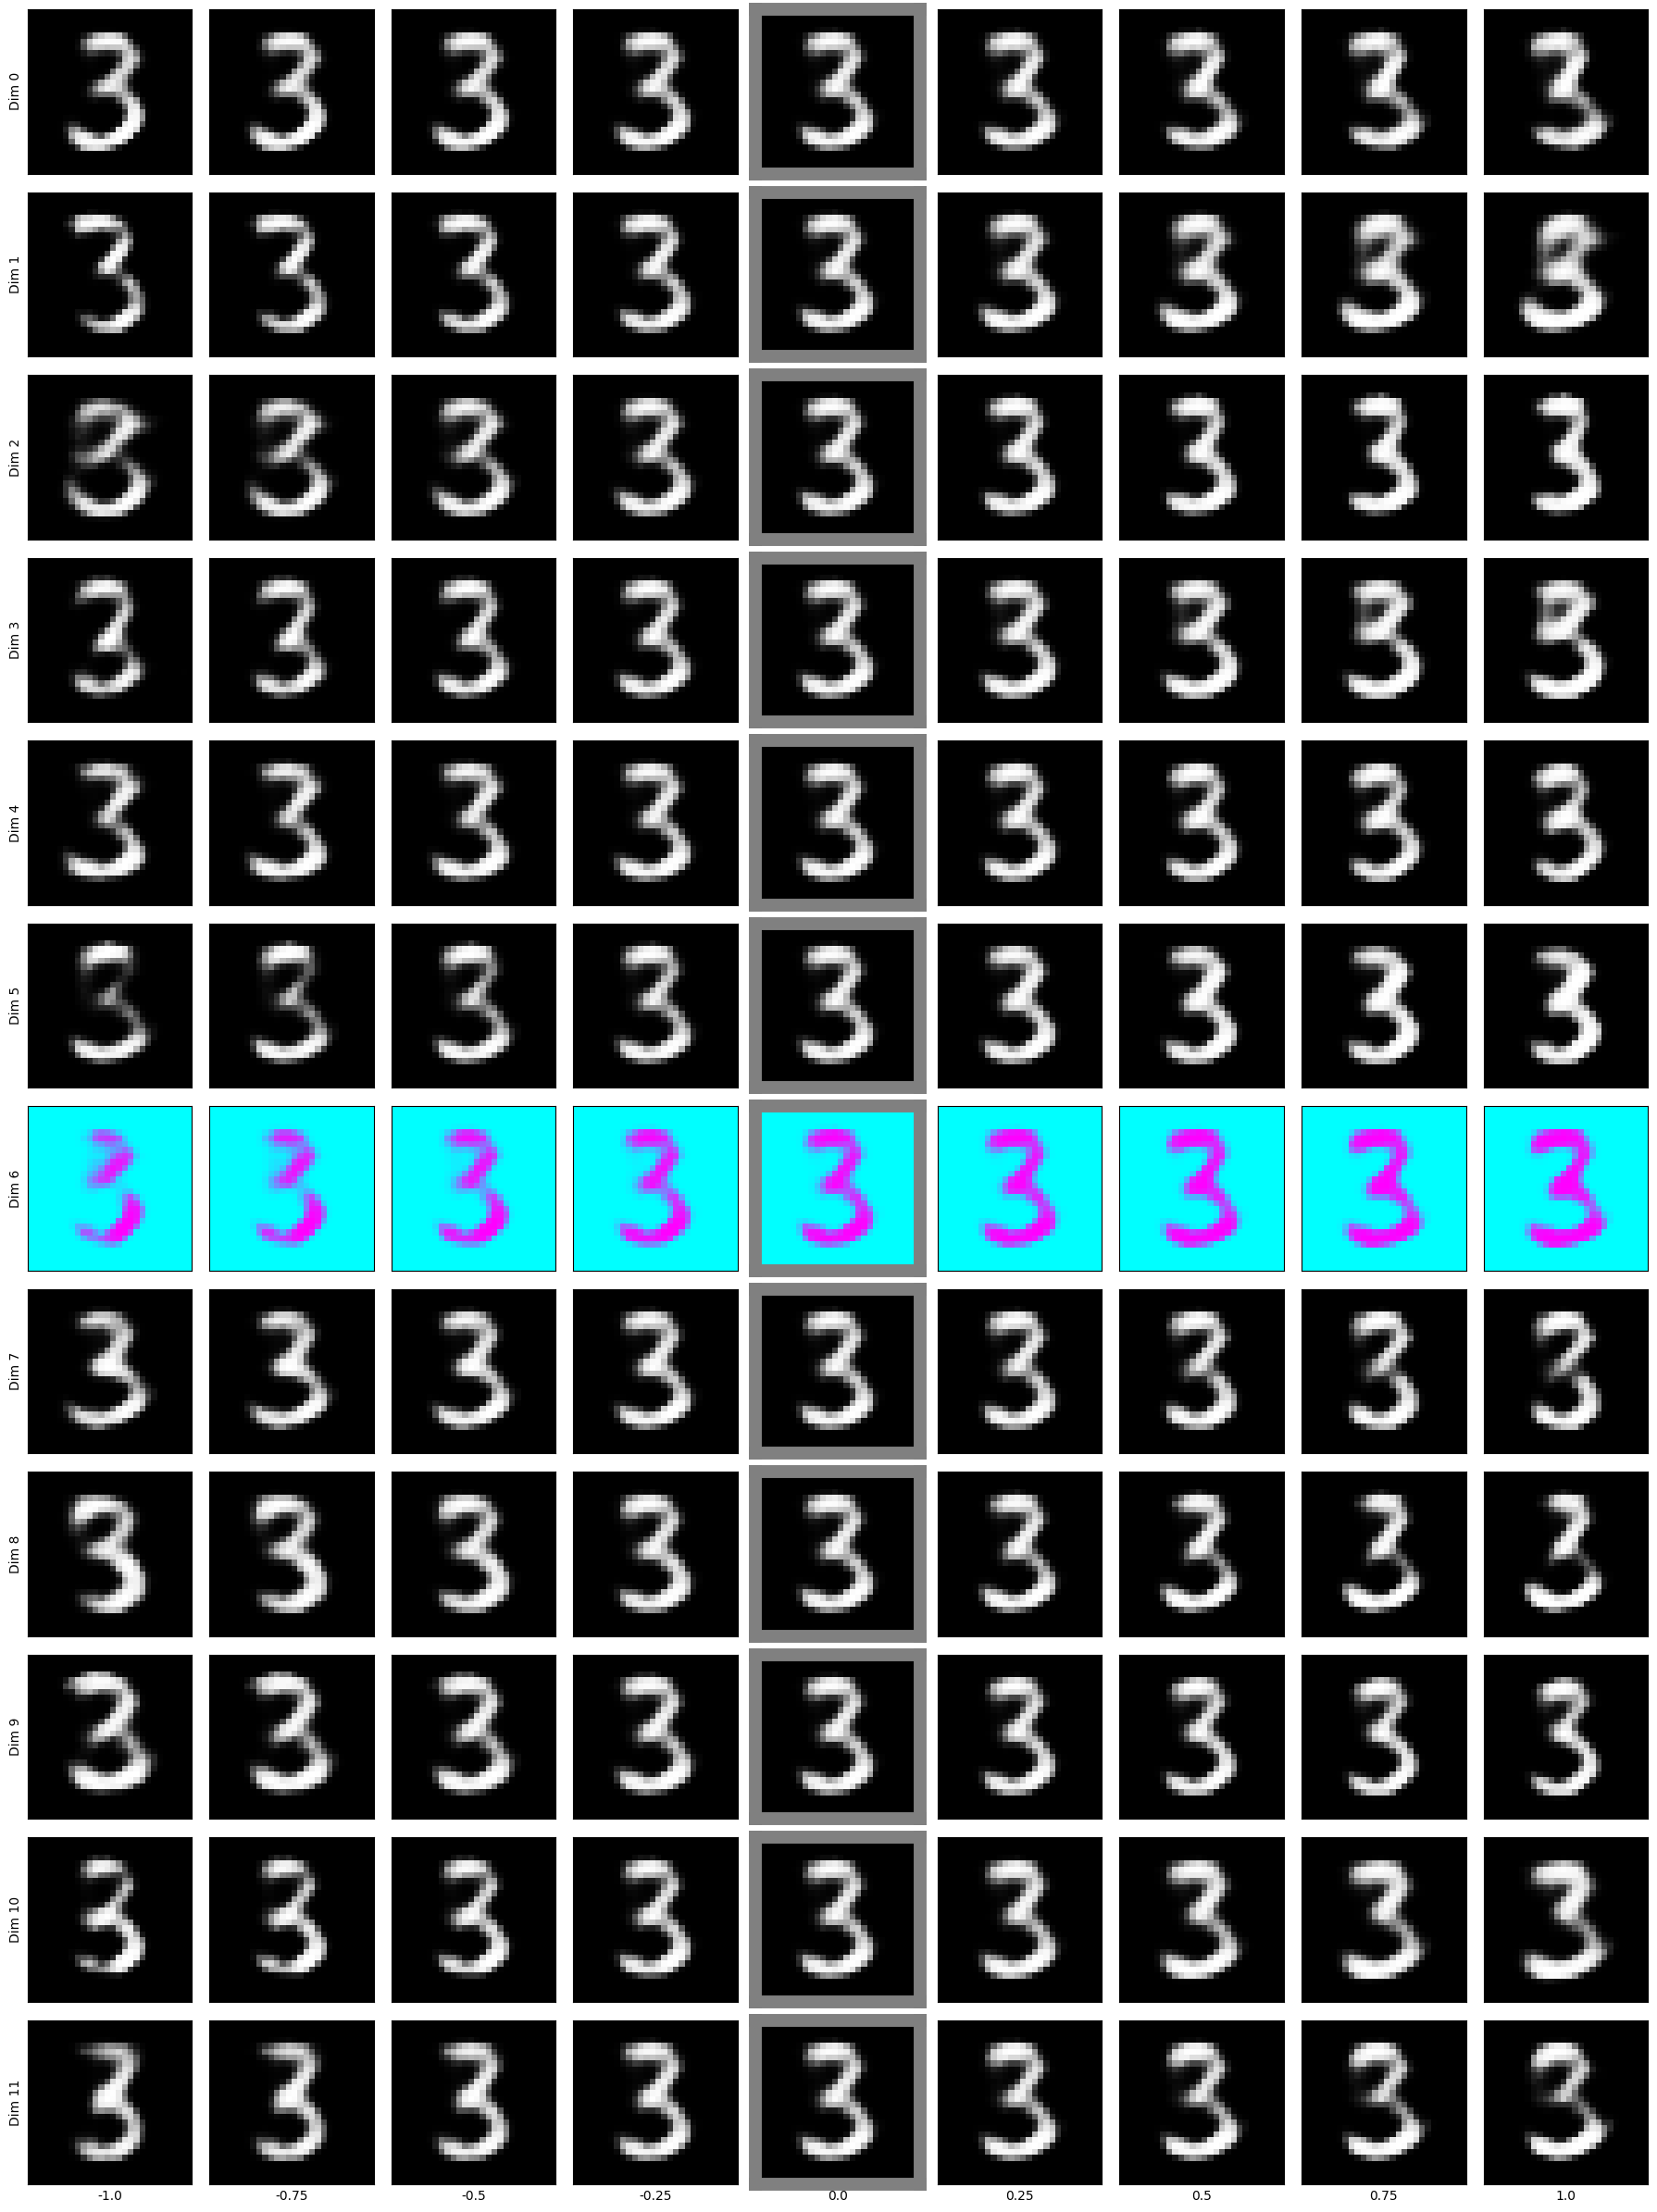

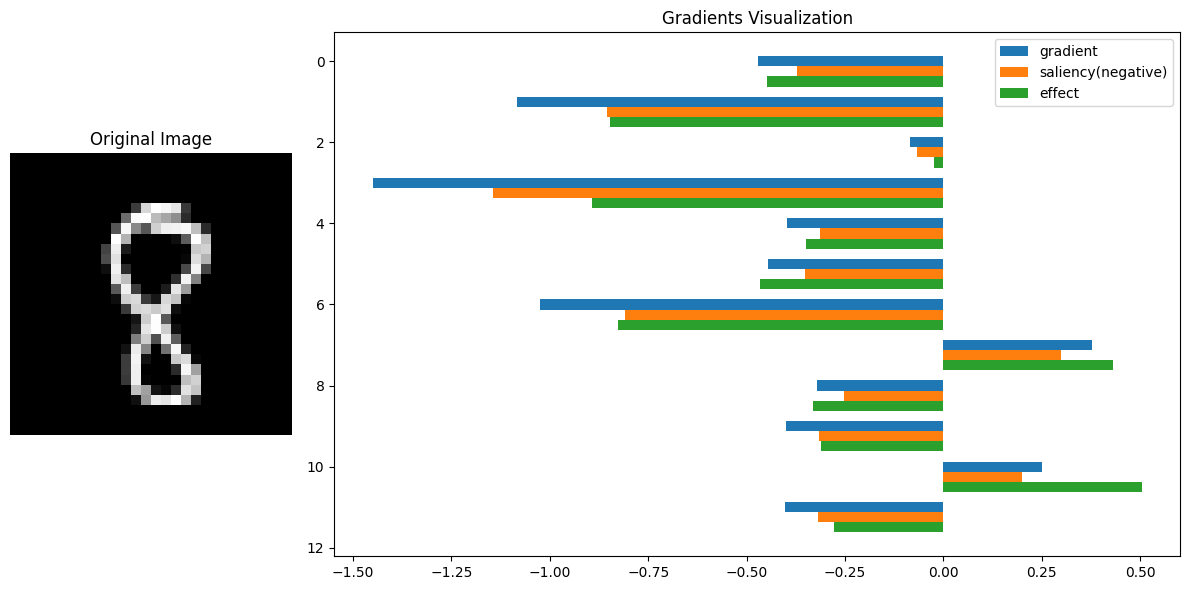

KeyboardInterrupt: 

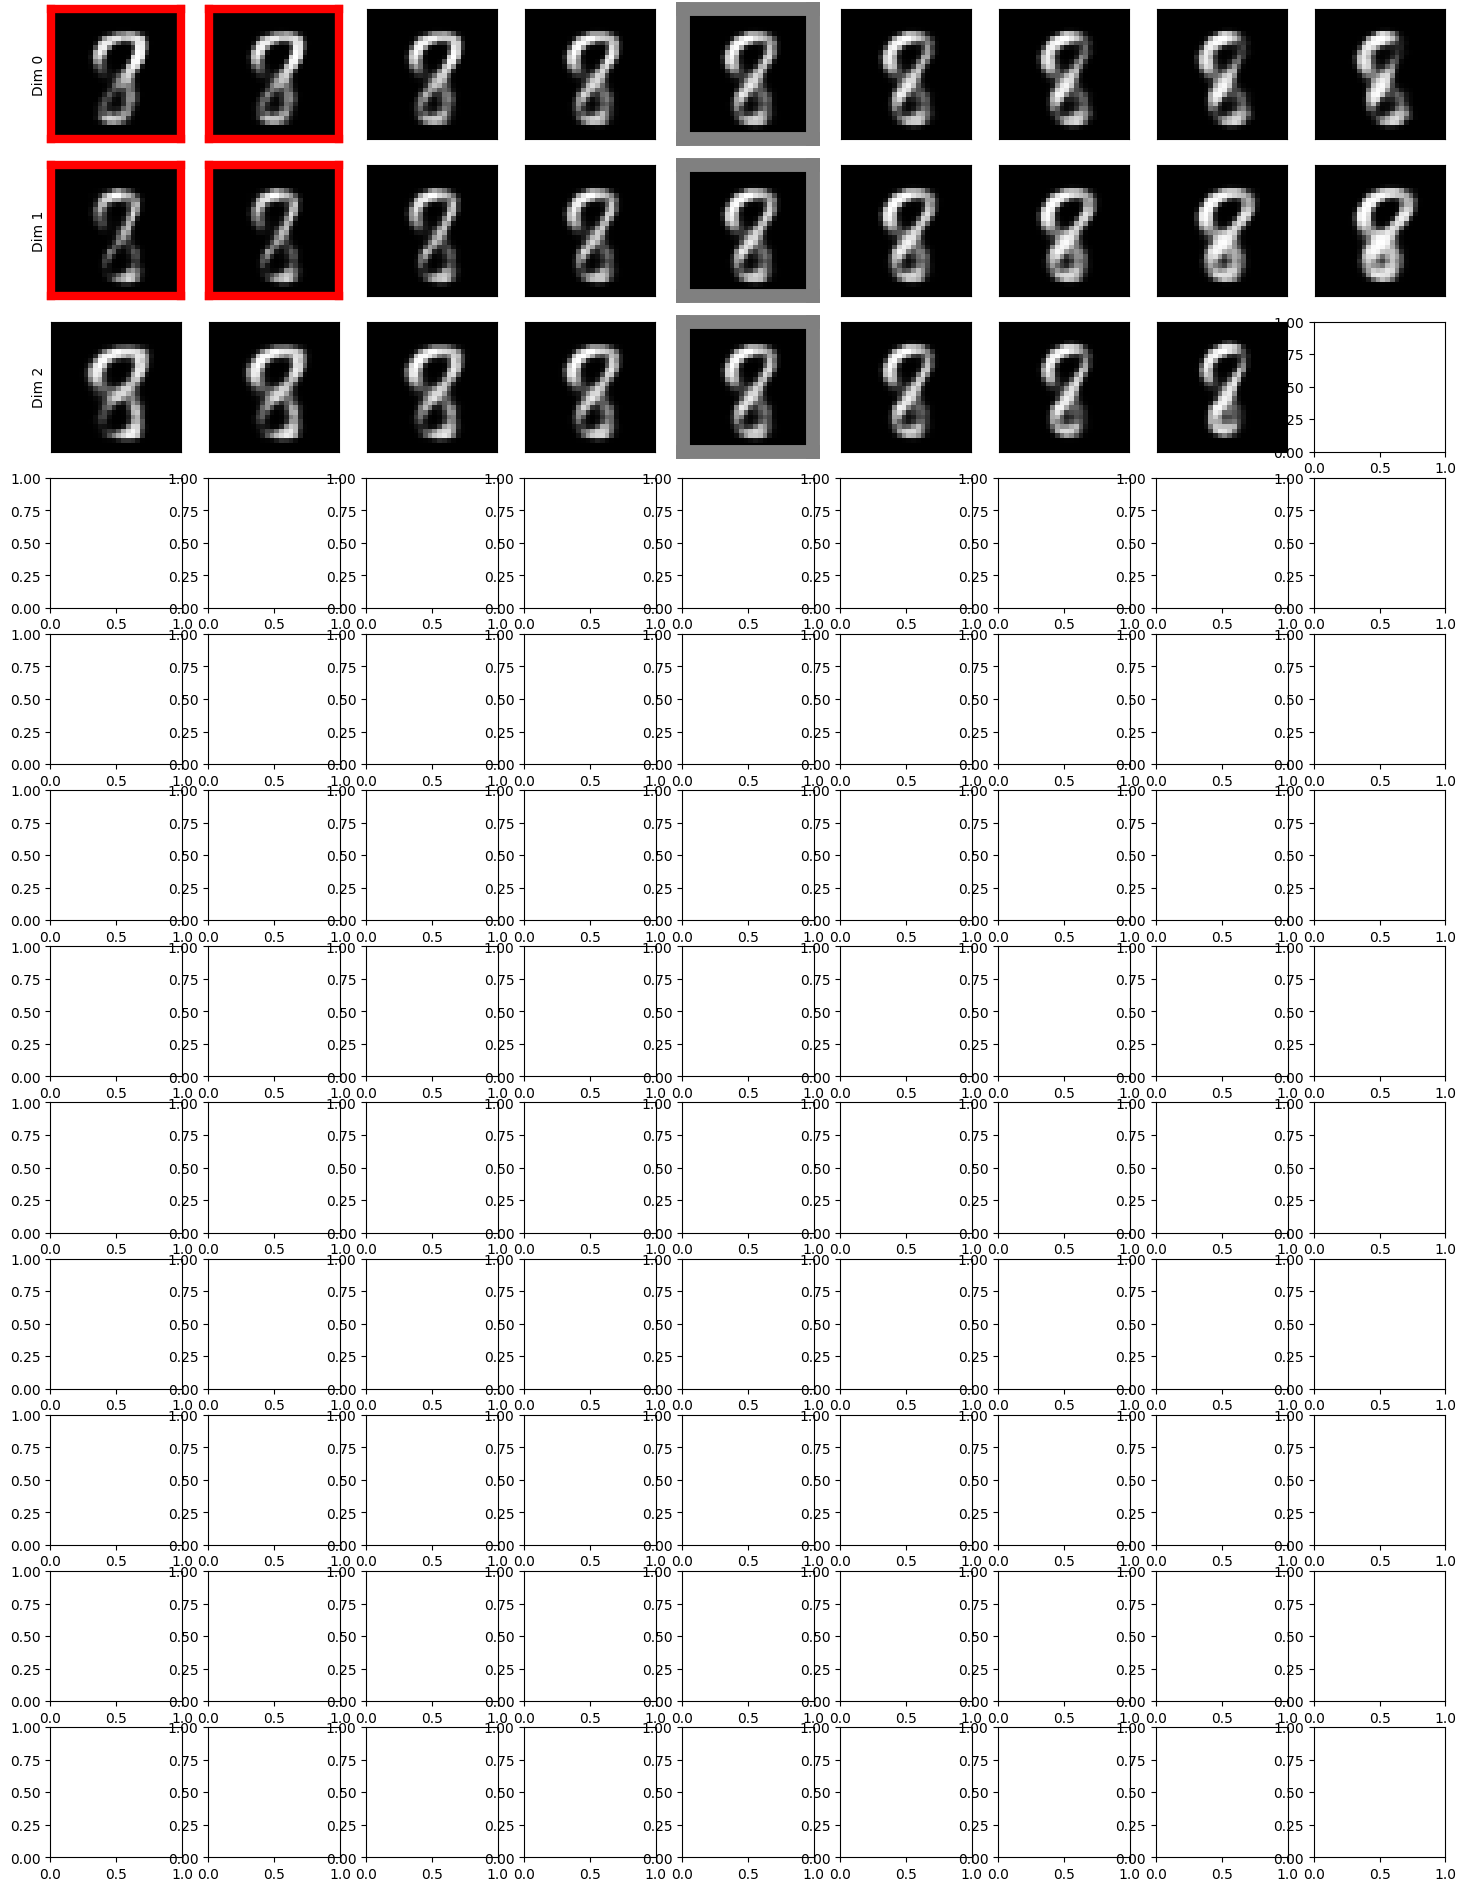

In [8]:
    count = 10
    for i in range(len(x_view)):
        x = np.array([h_view[i]])
        y = np.array([y_view_onehot[i]])
        g = gradient_of_x(x, y, xai)
        g2 = saliency_of_x(x, xai)
        g3 = effect_of_x(x, y, xai, delta=0.1)

        g_npy = np.squeeze(g.numpy())
        g_npy2 = np.squeeze(g2.numpy())
        g_npy3 = g3
        plot_image_and_gradients(np.reshape(x_view[i], (28, 28)), [g_npy, -g_npy2, g_npy3], ["gradient", "saliency(negative)", "effect"])

        # Identify the maximum gradient entry
        max_grad_index = np.argmax(np.abs(g_npy))
        # latent_space_display(x, vae.decoder, highlight_dim=max_grad_index)
        latent_space_display_mark(x, view_sample_labels[i], vae.decoder, xai, highlight_dim=int(max_grad_index))

        if count <= 0:
            break
        count -= 1
